# *Exploratory Data Analysis of World Happiness Index and its Correlation with Possibly Relevant Factors:*


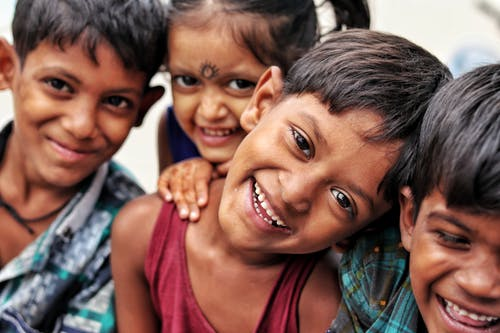



The Britannica Encyclopedia defines happiness as, "*the state of emotional well-being that a person experiences either in a narrow sense, when good things happen in a specific moment, or more broadly, as a positive evaluation of one’s life and accomplishments overall—that is, subjective well-being.*" Therefore in a general sense, happiness broadly comes from personal experiences, and its definition is subjective to things people give priority to. 

For example, a person working in a stressful high-income job may be just as content with his/her life, as another person working in a stress-free low-income job, if the former weighs happiness mainly on wealth and exuberance, while the latter gives more importance to the time he/she gets to spend with his/her family. 

Since both of us are navigating the stress (and thrills) of graduate life, finding happiness everyday is something which we value quite deeply. Therefore through this exploratory data analysis, we seek to answer the following question: "*Is there a particular set of factors, which has a strong correlation when it comes to determining individual happiness?*"

Discounting the highly personal and subjective factors, for which obtaining data is an intractable task, we narrow our focus down to factors which can be quantified and for which one can easily acquire reliable numerical data on their hands.  



# *How do we measure Happiness ?*

Being engineers who are aspiring to be data scientists in the near future, throughout this case study our dealings will be only with numerical data.

Therefore, before we can even touch upon any of the factors that contribute to happiness, we need to first determine whether by any chance, we can obtain a measure of happiness.

As it turns out, there is a group which specializes in this: "Gallup Incorporated".

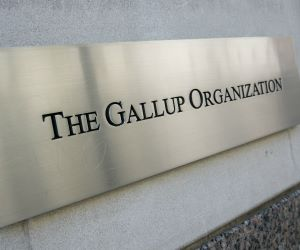

Gallup, Inc. is an American analytics and advisory company based in Washington, D.C. Founded by statistician George Gallup in 1935, the company became known for its public opinion polls conducted worldwide ([Cited from here](https://en.wikipedia.org/wiki/Gallup,_Inc.#Gallup_Poll)).

Since 2005, Gallup has been conducting its World Poll, which surveys citizens in 160 countries, thereby representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items. One of the areas this poll focuses on is well-being, where it measures something quite relevant to our study: "**Happiness Score**".

The happiness scores are evaluated upon respondent's answers to the main life evaluation question asked in the poll. This question, also known as the **Cantril Self-Anchoring Striving Ladder**, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. Aggregating the results from respondents of a particular country (usually about 1000-2000 samples), a national average of happiness is then calculated (obtaining a mean estimate with 95% confidence, [Cited from here](https://worldhappiness.report/faq/)).

The Gallup World Poll data is heavily utilized by the Sustainable Development Solutions Network (a division of the United Nations) in creating it's **World Happiness Report** (which comes out every one or two years, and is currently celebrating its 10th year anniversary).

Based on the Gallup World Poll data, from 2007 to 2011 (before the publication of the first World Happiness Report in 2012), and from the data used in the World Happiness Report in the years following that till 2021, an aggregrated dataset of happiness scores was created and made available in Kaggle ([Dataset here](https://www.kaggle.com/datasets/unsdsn/world-happiness)). This will be our primary dataset on which we shall perfrom our analysis.

# Datasets Used:

1. **World Happiness Data**: As described in the previous section, we have obtained this dataset from an aggregation of Gallup World Poll Data from 2007 till 2021, which has been made available for public use in Kaggle ([Dataset here](https://www.kaggle.com/datasets/unsdsn/world-happiness)). The dataset consists of the following columns:

*  "Country name": Contains the name of 155 countries.
*  "year": The year of the data.
*  "Life Ladder": The national average of the happiness scores calculated as explained in the section before.
*   The remaining 6 columns: "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", and "Perceptions of corruption", are not used for evaluating the happiness score directly, but based on certain coefficients, their values are used to estimate how much they impact the happiness score of a country (For more detail, [give this a read](https://happiness-report.s3.amazonaws.com/2022/WHR+22.pdf)).

  Some of the last columns we mentioned above will be used for our later analysis, as factors on which happiness depends. However we shall not be using the data for these factors from this dataset. Instead, we shall be sourcing the data from another more comprehensive dataset (The Human Development Index Dataset), we shall discuss next. From this dataset, we shall be mainly using the first three columns: "Country name", "year", and "Life Ladder".  
   


2. **Human Development Index Data**: UNDP defines Human Development Index as a "*summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.*"

  This dataset, originally sourced from UNDP's Human Development Reports ([check here](https://hdr.undp.org/)) and publicly made available in Kaggle ([check here](https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset/code)), contains more than 30 years of Human Development Index (HDI) data of 195 countries (superset of countries in World Happiness Data.), and the different factors that influence HDI. For viewing the complete list of columns (factors), refer to the HDI dataset provided with this notebook.

  I should also mention that, although one of the main columns of this dataset is the HDI column, we won't be using this column for our analysis, as the HDI is obtained through a deterministic formulation of the various factors on which it depends. Therefore if we attempt to find the correlation of the happiness score with HDI as well as with its various factors, our analysis will utlimately become redundant. Instead, we shall be focusing on the key factors of HDI, as they are more fundamental, diverse, and as per our intuition, we believe that these factors should have a strong correlation with the happiness score. 
  
  Therefore, the columns of this dataset which we choose for our analysis are as follows:

  a) "Gross National Income Per Capita (2007)" to "Gross National Income Per Capita (2021)"

  b) "Life Expectancy at Birth (2007)" to "Life Expectancy at Birth (2021)"

  c) "Mean Years of Schooling (2007)" to "Mean Years of Schooling (2021)"

  d) "Gender Inequality Index (2007)" to "Gender Inequality Index (2021)"


3. **Global Suicide Data**: This dataset contains suicide data across nations from 2000 to 2019. It was originally scraped from WHO mortality statistics ([link 1](https://www.who.int/data/data-collection-tools/who-mortality-database)) and ICD10 death classification codes ([link 2](https://health.mo.gov/data/documentation/death/death-icd10.php)), and made available for open use in Kaggle ([check here](https://www.kaggle.com/datasets/fernandoretamales/health-expenditure-and-suicide-rates)).

  We shall be mainly using three columns of this dataset:"Country_Name", "Year", and "Suicide_p100" for the years 2007 to 2019.

  Notice here, we use "Suicide_p100" (Deaths by Suicide per 100 people) instead of "Death_Suicides" (Total Deaths by Suicide). The reason behind this is if a country with more population, has the same suicide rate as a country with a smaller population, then comparing these countries on the basis of total suicides per year would be judging them on an unfair criteria. Therefore to make our comparisons as error-free and fair as possible, we choose to perform our analysis based  on suicides per 100 people instead of total suicides.   

# *How Shall We Proceed ?*

Before we get started, it is important that we provide an outline of the steps we are going to take in order to try and achieve our objective of our data analysis: namely, finding the factors which have a strong correlation with happiness. The steps are as follows:

a) **Preprocessing the Data**: The preliminary and unavoidable task of almost every Exploratory Data Analysis project performed till date. Although we were quite fortunate to deal with data that came mostly clean, we still had to perform some amount of preprocessing on the three datasets mentioned in the previous section. So, firstly we dropped the columns which were irrelevant to our analyses and renamed some of the remaining columns to bring about more clarity (check the code for more details). 

For the human development index dataset, we fill the empty entries of the dataset with NaN values (we check for this condition later on while performing our main analysis). To our good fortune, we find that for the relevant columns in the happiness score and suicide rate datasets, there are no empty entries.

Finally for all the datasets, we keep only the entries for the years following 2007. For the happiness dataset, there were some data before 2007, but they were extremely scanty, and insufficient to make a proper analysis, and therefore we only consider the dataset from the year 2007 to 2021. Therefore, to make the timelines coincide, we only keep the columns of the human development index dataset from the years 2007 to 2021, and the rows of the suicide data from the years from 2007 to 2019 (data for suicide data goes as far as 2019).

b) **Visualizations and Inference**: Now, coming to the main part of our analysis. The brief descriptions of the visualizations we provide in this notebook, and the conclusions we seek to draw from them are follows:


1. Time Series plot of the happiness score of the top 3 countries and bottom 3 countries with highest and lowest happiness score averages (calculated over the years 2007-2021) respectively. The objective of showing this plot is to evaluate the steadiness of happiness score on extreme sides of the spectrum of well-being. Mainly we try to answer the question, "Is the happiness score steady for both groups of countries?". Through this answer, we can try to gauge the socio-political and economic stablility of both these groups of countries.

2. For each of the years (2007 to 2021), we plot a heatmap of the world, where countries are shaded with their respective happiness scores (only those countries for which we have data available). Although we ourselves have not drawn any further inference from this visualization, however, the purpose of this heatmap is to serve as a visual aid, in order to help the readers compare the happiness scores between countries (or even between continents), and to better understand how the happiness scores in countries have changed over the years.

3. Now, we next try to find the correlation trend (for the years 2007-2021) between happiness scores and the following factors:

  *   Gross National Income per Capita
  *   Life Expectancy at Birth
  *   Literacy Rate (Mean Years of Schooling)
  *   Gender Inequality Index
  *   Suicide Rate per 100,000

  Showing the five correlation trends as line plots all in one graph, we try to find how the correlation between each of these factors and happiness scores have changed over the years, and more importantly, which of these factors have a strong correlation with happiness.

4. As we shall see later, from the previous visualization, we find that there are 3 factors with which happiness score has a strong correlation: Gross National Income Per Capita, Life Expectancy, and Gender Inequality Index.

  In order to determine and reinforce the accuracy of this conclusion, we have plotted these the average value of these three metrics for each country (in the human development index dataset) in a 3D scatter plot and annotated the countries with the top 3 Happiness Scores (which we obtain from the first visualization). 

  From the 3D scatter plot thus obtained, we seek to determine whether life expecatancy and gross national income per capita has a positive correlation with each other (since they are both positively correlated with happiness score), and whether both of them have a negative correlation with gender inequality index (which is negatively correlated with happiness).

5. Finally, we provide a set of visualizations and inferences to determine whether the pandemic had an impact on any of the factors which has a strong correlation with the happiness score.  We shall find later that one of these factors, i.e. **Life Expectancy at Birth**, showed a significant dip in many countries during the first years of the pandemic (2020,2021). 

  Since this factor has a strong positive correlation with the happiness score, we try to determine whether the happiness score also shows a similar decline during the pandemic years. 

In [ ]:
!pip install plotly
!pip install pycountry
!pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=57550760d44a129f47ce8296d3a8f453d309706d538abfe21ba2e1b68574cce0
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 5.9 MB/s 
     |████████████████████████████████| 316 kB 57.0 MB/s 
     |████████████████████████████████| 298 kB 47.5 MB/s 
     |████████████████████████████████| 297 kB

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import pycountry
import pycountry_convert
import scipy.stats
import math
from matplotlib import pyplot as plt
from pylab import figure as pylfigure
import seaborn as sns

In [ ]:
#Preprocessing functions:

def load_dataframe(path):
    '''
    Returns a dataframe read from the given path
    @param path: path of the csv file
    @type path: str
    '''
    assert isinstance(path, str)
    df = pd.read_csv(path)
    return df


def drop_columns(df, columns):
    '''
    Returns the dataframe after removing the given columns

    @param df: Dataframe
    @param columns: list of column names to be dropped
    @type df: pd.DataFrame
    @type columns: List

    '''

    assert isinstance(df, pd.DataFrame)
    assert isinstance(columns, list)

    return df.drop(columns, axis=1)


def rename_columns(df, columns):
    '''
    Returns the dataframe after renaming the given columns

    @param df: Dataframe
    @param columns: dictionary with keys as old column names and values as the new column names
    @type df: pd.DataFrame
    @type columns: Dict

    '''

    assert isinstance(df, pd.DataFrame)
    assert isinstance(columns, dict)

    return df.rename(columns, axis=1)


def fill_empty_with_NaN(df, col_name, old_value):
    '''
    Returns the dataframe with the date column split into year, month and date column based on num

    Note: if num=1, then only year col is added. If num=2, year and month columns are added. If num=3, year,month and day columns are added
          Column names = 'Year', 'Month' (in 3-char format) and 'Day'

    @param df: Input dataframe
    @param col_name: Column name to be type-casted to float
    @param old_value: value to be replaced
    @type df: pd.DataFrame
    @type col_name: string
    @type old_value: string
    '''
    assert isinstance(df, pd.DataFrame)
    assert isinstance(col_name, str)
    assert isinstance(old_value, str)

    df[col_name] = df[col_name].replace(old_value, np.nan)
    return df[col_name]

def drop_rows(df):
  '''
  Drops the rows of the input dataframe which contain NaN values.

  @param df: Input dataframe
  @type df: pd.DataFrame
  @return: The modified dataframe that contains only filled rows.
  @rtype: pd.DataFrame
  '''

  assert isinstance(df, pd.DataFrame)

  return df.dropna(axis = 0, how = 'any')

In [ ]:
#Preprocessing the World Happiness Report dataset:

whr_data = load_dataframe('world-happiness-report.csv')

whr_data = rename_columns(whr_data, {'Country name':'Country','year':'Year','Life Ladder':'Happiness_Score','Log GDP per capita':'GDP', 'Social support':'Social_Support', 'Healthy life expectancy at birth': 'Life_Expect_at_Birth', 'Freedom to make life choices':'Personal_Freedom', 'Perceptions of corruption': 'Corruption'})

whr_data = drop_columns(whr_data,['Positive affect', 'Negative affect'])

whr_data = whr_data.loc[(whr_data['Year'] >= 2007) & (whr_data['Year'] <= 2021)]

whr_data

,Country,Year,Happiness_Score,GDP,Social_Support,Life_Expect_at_Birth,Personal_Freedom,Generosity,Corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
2094,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
2095,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
2096,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
2097,Afghanistan,2021,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [ ]:
#Preprocessing the Human Development Index dataset:

hdi_data = load_dataframe('Human Development Index.csv')

def getHDIDataFiltered(hdi_data):
    '''
    Returns the dataframe after filtering and cleaning the data for Human Development Index (HDI) data

    @param hdi_data: Human Development Index (HDI) Dataframe
    @type hdi_data: pd.DataFrame
    '''

    # Drop Unused Columns
    columns_to_drop = [
            'Adolescent Birth Rate', 'Inequality Adjusted Human Development Index','Material footprint', 
            'Planetary Pressures', 'Male', 'Female', 'UNDP Developing Regions', 'Carbon dioxide'
            ]
    columns_to_drop += [str(i) for i in range(1990, 2007)]

    for cols in columns_to_drop:
        hdi_data = hdi_data[hdi_data.columns.drop(list(hdi_data.filter(regex=cols)))]

    for c in hdi_data.columns:
        hdi_data[c] = fill_empty_with_NaN(hdi_data, c,'')
    return hdi_data

hdi_data = getHDIDataFiltered(hdi_data)

hdi_data

,ISO3,Country,Human Development Groups,HDI Rank (2021),Human Development Index (2007),Human Development Index (2008),Human Development Index (2009),Human Development Index (2010),Human Development Index (2011),Human Development Index (2012),...,Difference from HDI value (%) (2012),Difference from HDI value (%) (2013),Difference from HDI value (%) (2014),Difference from HDI value (%) (2015),Difference from HDI value (%) (2016),Difference from HDI value (%) (2017),Difference from HDI value (%) (2018),Difference from HDI value (%) (2019),Difference from HDI value (%) (2020),Difference from HDI value (%) (2021)
0,AFG,Afghanistan,Low,180.0,0.424,0.430,0.440,0.448,0.456,0.466,...,1.072961,1.054852,1.043841,0.836820,0.831601,0.829876,0.828157,0.819672,0.828157,0.836820
1,AGO,Angola,Medium,148.0,0.475,0.486,0.500,0.510,0.526,0.541,...,2.957486,3.079710,2.664298,2.577320,2.013423,1.842546,1.680672,1.512605,1.525424,1.535836
2,ALB,Albania,High,67.0,0.730,0.736,0.741,0.754,0.766,0.778,...,6.940874,6.624204,7.575758,7.044025,7.769424,8.104738,7.196030,7.283951,7.178841,7.160804
3,AND,Andorra,Very High,40.0,0.847,0.850,0.848,0.848,0.849,0.869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,26.0,0.831,0.834,0.833,0.835,0.840,0.846,...,39.125296,39.319249,41.792782,44.855491,46.896552,48.160535,42.354235,43.586957,43.201754,43.139407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,111.0,0.708,0.709,0.700,0.713,0.713,0.709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,YEM,Yemen,Low,183.0,0.498,0.501,0.506,0.510,0.509,0.512,...,2.343750,2.339181,2.376238,1.886792,1.927195,1.742919,1.525054,1.518438,1.521739,1.538462
192,ZAF,South Africa,High,109.0,0.644,0.653,0.665,0.675,0.686,0.696,...,10.775862,10.937500,10.393258,9.636872,9.596662,9.583333,9.366391,9.375000,9.078404,9.116410
193,ZMB,Zambia,Medium,154.0,0.495,0.506,0.519,0.529,0.534,0.548,...,2.372263,2.346570,1.974865,1.779359,1.773050,1.760563,1.573427,1.391304,1.403509,1.415929


In [ ]:
#Preprocessing the Health Expenditure and Suicide Rate dataset:

sr_data = load_dataframe('WHO_MHExp_and_Deaths.csv')

def getSuicideRateData(sr_data):
    '''
    Returns the dataframe after filtering and cleaning the data for Health Expenditure and Suicide rate data

    @param hdi_data: Health Expenditure and Suicide rate Dataframe
    @type hdi_data: pd.DataFrame
    '''

    for c in sr_data.columns:
        sr_data[c] = fill_empty_with_NaN(sr_data, c,'')

    # Drop Unused Collumns
    columns_to_drop = [
            'HExp_Pctage_Y', 'MHExp_Pctage_2011', 'Dep_Num_2015'
            ]

    sr_data = rename_columns(sr_data, {'Country_Name': 'Country'})
    sr_data.drop(columns_to_drop, axis=1, inplace=True)
    sr_data = sr_data.loc[(sr_data['Year'] >= 2007) & (sr_data['Year'] <= 2019)]
    return sr_data

sr_data = getSuicideRateData(sr_data)
sr_data

,Country,Year,Population,Deaths_All_Types,Deaths_Suicides,Suicide_p100
1,Armenia,2007,3107395.5,53660,0,5.02
2,Armenia,2008,3234031.0,54824,63,4.23
3,Armenia,2009,3066044.0,55120,53,4.06
4,Armenia,2012,3024127.0,55200,79,6.39
5,Armenia,2013,3021979.0,54392,67,5.31
...,...,...,...,...,...,...
526,Uzbekistan,2015,31298929.0,304070,2392,9.20
527,Uzbekistan,2016,31847898.0,309582,2467,9.21
528,Uzbekistan,2017,32388561.0,321446,2417,8.92
529,Uzbekistan,2018,32956099.0,309826,2278,8.73


In [ ]:
#Functions for plotting the world map indicating the happiness scores of different countries.

def add_iso_code_col(df):
  '''
  Returns the dataframe after adding a column with represents the corresponding ISO code for the country
  
  @param df: input dataframe
  @type df: pd.DataFrame
  '''
  assert isinstance(df,pd.DataFrame)

  df['ISO'] = ['' for i in range(len(df))]
  
  assert "Country" in df.columns

  for i in df.index:
      if df['Country'][i] == "Congo (Brazzaville)":
        df['ISO'][i] = pycountry_convert.country_name_to_country_alpha3("Republic of the Congo")
      elif df['Country'][i] == "Congo (Kinshasa)":
        df['ISO'][i] = pycountry_convert.country_name_to_country_alpha3("Democratic Republic of the Congo")
      elif df['Country'][i] == "Palestinian Territories":
        df['ISO'][i] = pycountry_convert.country_name_to_country_alpha3("Palestine")
      elif df['Country'][i] == "Taiwan Province of China":
        df['ISO'][i] = pycountry_convert.country_name_to_country_alpha3("Taiwan")
      elif df['Country'][i] == "Iran (Islamic Republic of)":
        df['ISO'][i] = pycountry_convert.country_name_to_country_alpha3("Iran")
      elif df['Country'][i] == "Republic of Korea":
        df['ISO'][i] = pycountry_convert.country_name_to_country_alpha3("South Korea")
      elif df['Country'][i] == "Saint Helena":
        df['ISO'][i] == pycountry_convert.country_name_to_country_alpha3("Saint Helena, Ascension and Tristan da Cunha")
      elif df['Country'][i] == "The United Kingdom":
        df['ISO'][i] == pycountry_convert.country_name_to_country_alpha3("United Kingdom")
      elif df['Country'][i] == "Sint Maarten":
        df['ISO'][i] = "SXN"
      elif df['Country'][i] == "Northern Mariana Islands (Commonwealth of the)":
        df['ISO'][i] = "MNP"
      elif df['Country'][i] == "Türkiye":
        df['ISO'][i] =  pycountry_convert.country_name_to_country_alpha3("Turkey")
      elif df['Country'][i] == "Micronesia (Federated States of)":
        df['ISO'][i] = "FSM"
      elif df['Country'][i] == "Kosovo":
        df['ISO'][i] = "XXK"
      elif df['Country'][i] == "North Cyprus":
        df['ISO'][i] = "CYP"
      elif df['Country'][i] == "Hong Kong S.A.R. of China":
        df['ISO'][i] = "HKG"
      elif df['Country'][i] == "Somaliland region":
        df['ISO'][i] = "SOM"
      else:
        df['ISO'][i] = pycountry_convert.country_name_to_country_alpha3(df['Country'][i])
  
  return df

def happiness_world_map_by_year(df):
  '''
  Plots a world map for plotting the world map that shows the happiness scores of different countries.
  @param df: input dataframe
  @type df: pd.DataFrame
  '''
  assert isinstance(df,pd.DataFrame)
  assert "Happiness_Score" in df.columns

  iso_add_whr = add_iso_code_col(df)
  rows_for_plotting = iso_add_whr.loc[(iso_add_whr['Year'] >= 2007)]
  fig = px.choropleth(rows_for_plotting, locations = "ISO", color="Happiness_Score", animation_frame="Year", 
                        hover_name="Country",color_continuous_scale=px.colors.sequential.Sunsetdark)
  
  fig.update_layout(title="World Happiness through the Years", coloraxis_colorbar_title_text = "Score")

  return fig



# **HAPPINESS SCORE OVER THE YEARS**
Here we see the trend of the Happiness Score for the countries with **top 3** and **bottom 3** Happiness Score averages over the years 2007-2021. What is interesting here is that the happiest countries are Scandinavian countries and their scores are nearly constant over time. For the bottom 3 countries, we see significant fluctations and a slight dip in the score over the years.


In [ ]:
def plotTimeSeriesHappinessScore(whr_data):
  '''
  Plots the world happiness score over time for countries with top 3 and bottom 3 average scores
  
  @param df: input dataframe
  @type df: pd.DataFrame
  '''

  assert isinstance(whr_data, pd.DataFrame)
  top3 = whr_data.groupby('Country',as_index=False)['Happiness_Score'].mean().sort_values('Happiness_Score', ascending=False).head(3)
  bottom3 = whr_data.groupby('Country',as_index=False)['Happiness_Score'].mean().sort_values('Happiness_Score', ascending=True).head(3)
  whr_data = whr_data.loc[whr_data['Country'].isin(list(top3['Country']) + list(bottom3['Country']))]
  fig = px.line(whr_data, x="Year", y="Happiness_Score", color="Country")
  fig.update_layout(
    title=dict(
        text="Time Series plot for Happiness score of top 3 and bottom 3 countries",
        y=0.95,
        x=0.4,
        xanchor= 'center',
        yanchor= 'top',
        font=dict(size=20)
      ),
  )
  fig.show()

plotTimeSeriesHappinessScore(whr_data)


In the next diagram we can see the **heatmap** for the countries where the darker shades indicate regions with high Happiness Score and lighter regions are ones with relatively low scores. The dial at the bottom can be used to see the heatmap for different years

In [ ]:
happiness_world_map_by_year(whr_data)

<ipython-input-29-e79631cbbbbf>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-e79631cbbbbf>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-e79631cbbbbf>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-e79631cbbbbf>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

# FACTORS WITH STRONG CORRELATION WITH HAPPINESS SCORE
We know that happiness score is calculated from the results of the Gallup World survey, however it is not evident on how it can related to other metrics generally associated with a country. Some of the commonly used metrics are:

1. **Gross National Income per capita:** The gross national income (GNI), previously known as gross national product (GNP), is the total domestic and foreign output claimed by residents of a country, consisting of gross domestic product (GDP), plus factor incomes earned by foreign residents, minus income earned in the domestic economy by nonresidents (cited from [here](https://en.wikipedia.org/wiki/Gross_national_income)). The metric is obatined by dividing Gross National Income by the country's population.
2. **Life Expectancy at Birth:** The average number of years that a newborn could expect to live, if he or she were to pass through life exposed to the sex- and age-specific death rates prevailing at the time of his or her birth, for a specific year, in a given country, territory, or geographic area (cited from [here](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/65)).
3. **Mean years of schooling:** Average number of completed years of education of a country's population aged 25 years and older, excluding years spent repeating individual grades (cited from [here](http://uis.unesco.org/en/glossary-term/mean-years-schooling)). We are referring to this metric as **Literacy Rate.**
4. **Gender Inequality Index:** A composite index measuring average achievement in the three basic dimensions captured in the human development index—a long and healthy life, knowledge and a decent standard of living— adjusted to account for inequalities between men and women (cited from [here](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3670)).

The data for the metrics is collected from the Human Development Index dataset (refer above). Another metric with which we can calculate the correlation of the Happiness Score is the **Suicide count per 100,000 population** whose dataset is picked the WHO Mortality stats published for the years 2000-2019 (for more info refer above).

After getting the data of the metrics across different countries, we plot the trend in their correlation with the Happiness Score for years 2007-2019. Our goal is to find which of these has a strong correlation (+ve or -ve) with the Happiness Score.

In [ ]:
def correlation_between_gni_and_happiness(df1,df2):
    """
    Returns the correlation coefficient list between gross national income of countries and happiness scores over the years.
    
    @param df1: The dataframe containing the happiness scores of countries.
    @type df1: pd.DataFrame
    @param df2: The dataframe containing the gross national income of countries.
    @type df2: pd.DataFrame

    @return: The list of correlation coefficients between gross national income of countries and happiness scores over the years.
    @rtype: list
    """

    assert isinstance(df1, pd.DataFrame) and isinstance(df2, pd.DataFrame)
    assert "Happiness_Score" in df1.columns
    assert "Gross National Income Per Capita (2007)" in df2.columns
    
    df1 = add_iso_code_col(df1)

    correlation_coeffs = []

    for year in range(2007,2020):
      year_data = df1.loc[df1["Year"] == year]
      happiness_scores, gross_nat_income = [], []
      gni_col_string = "Gross National Income Per Capita " + "(" + str(year) + ")"

      for rows in year_data.index:
        for rows2 in df2.index:
          if year_data['ISO'][rows] == df2['ISO3'][rows2]:
            if math.isnan(df2[gni_col_string][rows2]):
              break
            happiness_scores.append(year_data['Happiness_Score'][rows])
            gross_nat_income.append(df2[gni_col_string][rows2])
            break

      correlation_coeffs.append(scipy.stats.pearsonr(happiness_scores,gross_nat_income)[0])

    return correlation_coeffs


def correlation_between_life_expectancy_and_happiness(df1,df2):
    """
    Returns the correlation coefficient list between life expectancy at birth for various countries and happiness scores over the years.
    
    @param df1: The dataframe containing the happiness scores of countries.
    @type df1: pd.DataFrame
    @param df2: The dataframe containing the life expectancy at birth for countries.
    @type df2: pd.DataFrame
    
    @return: The list of correlation coefficients between life expectancy at birth for various countries and happiness scores over the years.
    @rtype: list
    """

    assert isinstance(df1, pd.DataFrame) and isinstance(df2, pd.DataFrame)
    assert "Happiness_Score" in df1.columns
    assert "Life Expectancy at Birth (2007)" in df2.columns
    
    df1 = add_iso_code_col(df1)

    correlation_coeffs = []

    for year in range(2007,2020):
      year_data = df1.loc[df1["Year"] == year]
      happiness_scores, life_expect = [], []
      life_expect_col_string = "Life Expectancy at Birth " + "(" + str(year) + ")"

      for rows in year_data.index:
        for rows2 in df2.index:
          if year_data['ISO'][rows] == df2['ISO3'][rows2]:
            if math.isnan(df2[life_expect_col_string][rows2]):
              break
            happiness_scores.append(year_data['Happiness_Score'][rows])
            life_expect.append(df2[life_expect_col_string][rows2])
            break

      correlation_coeffs.append(scipy.stats.pearsonr(happiness_scores,life_expect)[0])

    return correlation_coeffs
  

def correlation_between_literacy_and_happiness(df1,df2):
    """
    Returns the correlation coefficient list between mean schooling years for different countries and happiness scores over the years.
    
    @param df1: The dataframe containing the happiness scores of countries.
    @type df1: pd.DataFrame
    @param df2: The dataframe containing the mean schooling years for different countries.
    @type df2: pd.DataFrame
    
    @return: The list of correlation coefficients between mean schooling years for various countries and their happiness scores over the years.
    @rtype: list
    """

    assert isinstance(df1, pd.DataFrame) and isinstance(df2, pd.DataFrame)
    assert "Happiness_Score" in df1.columns
    assert "Mean Years of Schooling (2007)" in df2.columns
    
    df1 = add_iso_code_col(df1)

    correlation_coeffs = []

    for year in range(2007,2020):
      year_data = df1.loc[df1["Year"] == year]
      happiness_scores, mean_schooling_years = [], []
      mean_schooling_col_string = "Mean Years of Schooling " + "(" + str(year) + ")"

      for rows in year_data.index:
        for rows2 in df2.index:
          if year_data['ISO'][rows] == df2['ISO3'][rows2]:
            if math.isnan(df2[mean_schooling_col_string][rows2]):
              break
            happiness_scores.append(year_data['Happiness_Score'][rows])
            mean_schooling_years.append(df2[mean_schooling_col_string][rows2])
            break

      correlation_coeffs.append(scipy.stats.pearsonr(happiness_scores,mean_schooling_years)[0])

    return correlation_coeffs
  

def correlation_between_suicide_rate_and_happiness(df1,df2):
    """
    Returns the correlation coefficient list between suicide rate of countries and happiness scores over the years.
    
    @param df1: The dataframe containing the happiness scores of countries.
    @type df1: pd.DataFrame
    @param df2: The dataframe containing the suicide rate of countries.
    @type df2: pd.DataFrame
    
    @return: The list of correlation coefficients between suicide rate of countries and their happiness scores over the years.
    @rtype: list
    """

    assert isinstance(df1, pd.DataFrame) and isinstance(df2, pd.DataFrame)
    assert "Happiness_Score" in df1.columns
    assert "Suicide_p100" in df2.columns

    df1 = add_iso_code_col(df1)
    df2 = add_iso_code_col(df2)
    

    correlation_coeffs = []

    for year in range(2007,2020):
      year_whr_data = df1.loc[df1["Year"] == year]
      year_suicide_data = df2.loc[df2["Year"] == year]
      happiness_scores, suicide_rate = [], []

      for rows in year_whr_data.index:
        for rows2 in year_suicide_data.index:
          if year_whr_data['ISO'][rows] == year_suicide_data['ISO'][rows2]:
            happiness_scores.append(year_whr_data['Happiness_Score'][rows])
            suicide_rate.append(year_suicide_data['Suicide_p100'][rows2])
            break
      
      correlation_coeffs.append(scipy.stats.pearsonr(happiness_scores,suicide_rate)[0])

    return correlation_coeffs


def correlation_between_gender_inequality_and_happiness(df1,df2):
    """
    Returns the correlation coefficient list between the gender inequality index of countries and happiness scores over the years.
    
    @param df1: The dataframe containing the happiness scores of countries.
    @type df1: pd.DataFrame
    @param df2: The dataframe containing the gender inequality index of countries.
    @type df2: pd.DataFrame
    
    @return: The list of correlation coefficients between the gender inequality of countries and their happiness scores over the years.
    @rtype: list
    """

    assert isinstance(df1, pd.DataFrame) and isinstance(df2, pd.DataFrame)
    assert "Happiness_Score" in df1.columns
    assert "Gender Inequality Index (2007)" in df2.columns
  
    df1 = add_iso_code_col(df1)

    correlation_coeffs = []

    for year in range(2007,2020):
      year_data = df1.loc[df1["Year"] == year]
      happiness_scores, gender_inequality_index = [], []
      gii_col_string = "Gender Inequality Index " + "(" + str(year) + ")"

      for rows in year_data.index:
        for rows2 in df2.index:
          if year_data['ISO'][rows] == df2['ISO3'][rows2]:
            if math.isnan(df2[gii_col_string][rows2]):
              break
            happiness_scores.append(year_data['Happiness_Score'][rows])
            gender_inequality_index.append(df2[gii_col_string][rows2])
            break

      correlation_coeffs.append(scipy.stats.pearsonr(happiness_scores,gender_inequality_index)[0])

    return correlation_coeffs

<ipython-input-8-b21ad83994b0>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

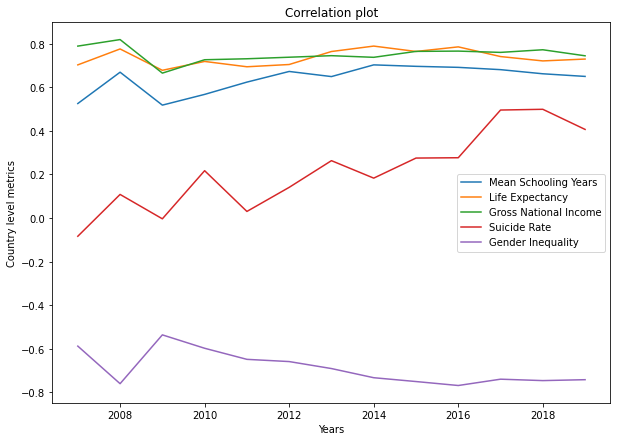

In [ ]:
x = list(range(2007,2020))

plt.figure(figsize=(10,7))

plt.plot(x,correlation_between_literacy_and_happiness(whr_data,hdi_data))

plt.plot(x,correlation_between_life_expectancy_and_happiness(whr_data,hdi_data))

plt.plot(x,correlation_between_gni_and_happiness(whr_data,hdi_data))

plt.plot(x,correlation_between_suicide_rate_and_happiness(whr_data,sr_data))

plt.plot(x,correlation_between_gender_inequality_and_happiness(whr_data,hdi_data))

plt.xlabel('Years')
plt.ylabel('Country level metrics')
plt.title('Correlation plot')

plt.legend(['Mean Schooling Years', 'Life Expectancy', 'Gross National Income', 'Suicide Rate', 'Gender Inequality'])


**Conclusion from above analysis:** We see that Gross National Income per capita, Life Expectancy at Birth have a strong **positive correlation** and Gender Inequality Index has a strong **negative correlation** with the Happiness Score. Interestingly, the suicide rate has a weak correlation with the Happiness Score. This basically means that a happy country may also see high suicidal tendencies and one is not an indicator of the other. We also see the literacy rate (mean schooling years) and has a positive correlation, but not a very strong one. Hence, the metrics which are informative with respect to the Happiness Score are: *Gross National Income per capita*, *Life Expectancy at Birth* and *Gender Inequality Index*.

To verify this conclusion, below we have plotted these 3 metrics in a 3D plot and annotated the countries with the **top 3 Happiness Scores**, which as we saw earlier, are **Denmark (DNK)**, **Finland (FIN)** and **Switzerland (SWI)**. As we can see, these countries lie in the region of high Gross National Income per capita and Life Expectancy, and low Gender Inequality Index. This verifies the results obtained from the analysis above.

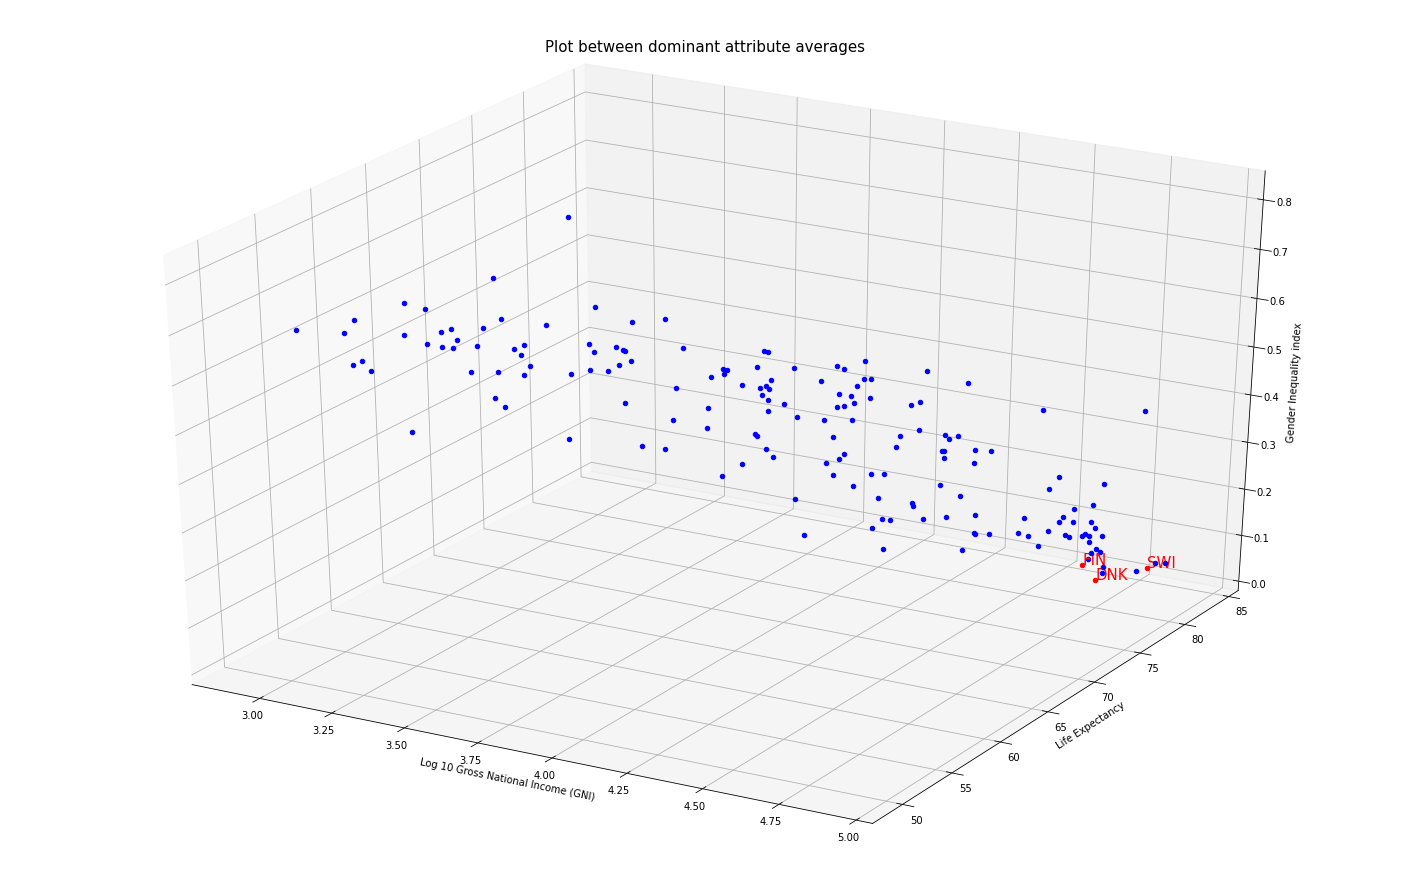

In [ ]:
def scatter_plot(df):
    '''
    Plots Gross National Income per capita (log10 scale), Life Expectancy at birth and Gender Inequality Index. Also annotates the position of Denmark, Finland and Switzerland on the plot

    @param df: Dataframe obtained from data for Human Development Index (HDI)
    @type df: pd.DataFrame
    '''
    assert isinstance(df, pd.DataFrame)
    assert len(df) > 0

    axis = pylfigure(figsize = (25, 16)).add_subplot(projection ="3d")
 
    Y = df.filter(regex='Life Expectancy').mean(axis=1)
    X = np.log10(df.filter(regex='Gross National Income').mean(axis=1))
    Z = df.filter(regex='Gender Inequality Index').mean(axis=1)
    iso_dict = {'Denmark': 'DNK', 'Finland': 'FIN', 'Switzerland': 'SWI'}
    for row in range(len(df)):
        if df['Country'][row] in ('Denmark', 'Finland', 'Switzerland'):
            axis.text(X[row],Y[row],Z[row],  '%s' % (iso_dict[str(df['Country'][row])]), size=15, zorder=10,  color='red') 
            axis.scatter(X[row], Y[row], Z[row], color='red')
            continue
        else:
            axis.scatter(X[row], Y[row], Z[row], color='blue')

    axis.set_title('Plot between dominant attribute averages',fontsize=15, pad=25.0)
    axis.set_xlabel('Log 10 Gross National Income (GNI)')
    axis.set_ylabel('Life Expectancy')
    axis.set_zlabel('Gender Inequality index')
    axis.invert_yaxis
    plt.show()

scatter_plot(hdi_data)

# Effect of the Covid Pandemic on World Happiness
In an intuitive sense, the covid pandemic is likely to affect the happiness, and hence influence the happiness score. But it maybe difficult to attach a quantitative sense to the effect, i.e, how much the influence would be. Can we somehow predict which countries are the worst affected without considering the survey data for the pandemic affected years (2020, 2021)? Lets have a look.

We can start by assuming the following. The pandemic is likely to affect the Gross National Income per capita for a country, due to the economical collapse of major industries like media, tourism, transportation, etc. It will also affect the Life Expectancy, since the number of deaths across different age groups will increase. However, it is not likely to affect the Gender Development Index. We can make these assumptions based on our observations. The reason that we have considered these 3 factors is because we have already seen that they **strongly influence** the Happiness Score, which is the metric we want to analyze.  

Based on this we want to check for which countries Gross National Income (per capita) and Life Expectancy were severly affected. For this, we first take the list of countries **most impacted (top 100)** as per the **World Health Organization (WHO)**. Link to the dataset can be found [here](https://covid19.who.int/WHO-COVID-19-global-table-data.csv).

Next, we consider the countries whose metrics were the **most impacted** during covid, i.e, where we see a **dip** in Gross National Income (per capita) and Life Expectancy, and plot the trend for the metrics for these countries over the years 2007-2021. This is basically a list of countries where the metrics dipped the most between the years 2019 and 2021. The corresponding region for these years is highlighted in the trend plots as well.

In [ ]:
def covid_most_impacted(df):
  """
  Function for obtaining the list of 100 countries (represented as iso-3 codes) which have been most affected my COVID (obtained by comparing countries on 
  the basis of covid cases per 100k people).
  
  @param df: the input dataframe which contains COVID-19 infection data (Source: WHO).
  @type: pd.DataFrame
  @return: The list of top 100 most covid-impacted countries (represented as iso-3 codes).
  @rtype: list
  """

  assert isinstance(df, pd.DataFrame)

  assert 'Cases - cumulative total per 100000 population' in df.columns

  df = df.sort_values(by = ['Cases - cumulative total per 100000 population'], ascending = False).head(100)

  df = add_iso_code_col(df)

  top_100_most_impacted_countries = list(df['ISO'])

  return top_100_most_impacted_countries

<ipython-input-8-b21ad83994b0>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

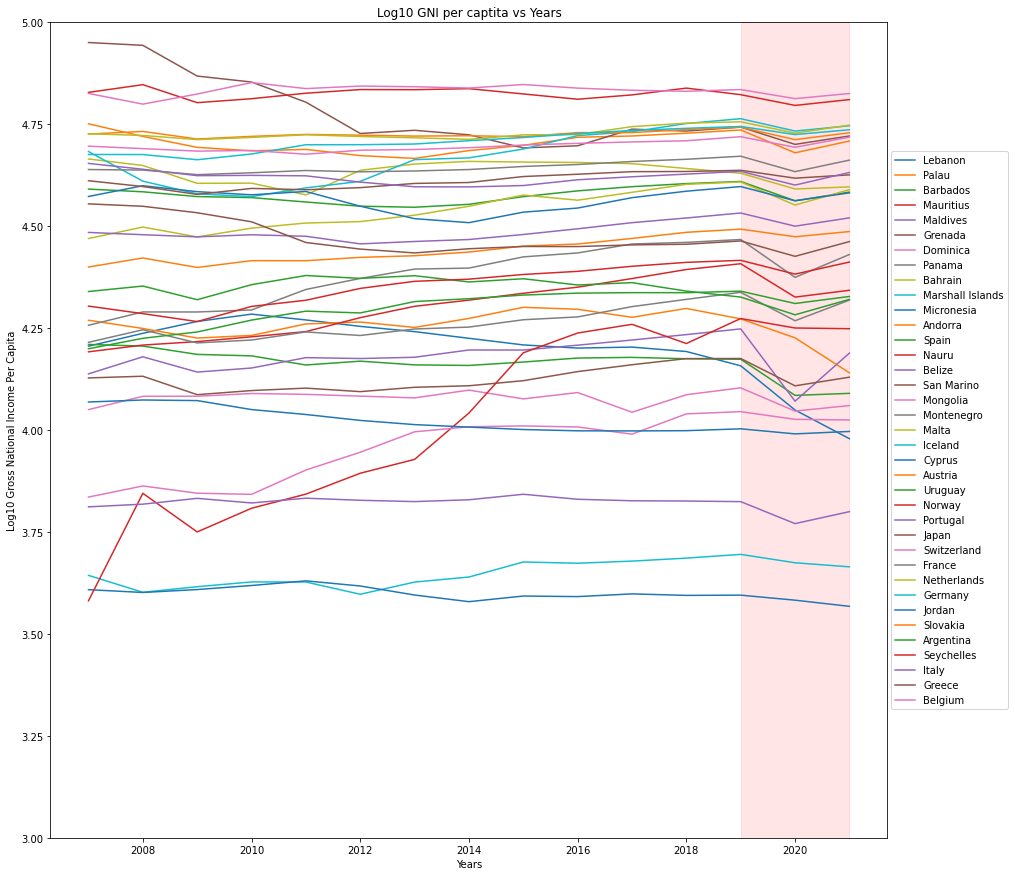

In [ ]:
covid_data = load_dataframe('WHO-COVID-19-global-table-data.csv')

def plot_gni_trend_covid(df, covid_df):
    """
    Plots Gross National Income (log10 scale) with year

    @param df1: The dataframe obtained from Human Development Index data
    @type df1: pd.DataFrame
    @param df2: The dataframe containing the top most covid impacted countries' ISO codes
    @type df2: pd.DataFrame
    
    @return: The list of the worst affected countries in terms of Gross National income
    @rtype: list
    """

    assert isinstance(df, pd.DataFrame)
    assert isinstance(covid_df, pd.DataFrame)
    assert len(df) > 0
    assert len(covid_df) > 0

    covid_iso = covid_most_impacted(covid_df)
    X = list(range(2007,2022))

    attr, country_list = [], []
    for iso in covid_iso:
        for index in df.index:
            attrc, le_country = [], []
            for xy in X:
                col = 'Gross National Income Per Capita' + " (" + str(xy) + ")" 
                attrc.append(df[col][index])
            if (df['ISO3'][index] == iso):
                country_list.append(df['Country'][index])
                attr.append(attrc)

    plt.figure(figsize = (15,15))
    slope_list = []
    for index in range(len(country_list)):
        slope = (attr[index][14] - attr[index][12]) / attr[index][12]
        if slope < 0:
            slope_list.append([slope, index])
    slope_list.sort() # sorts countries based on degree of impact
    worst_aff_country = []
    for x in slope_list:
        worst_aff_country.append(country_list[x[1]])
        plt.plot(X,np.log10(attr[x[1]]))
  
    plt.ylim(3,5)
    plt.title('Log10 GNI per captita vs Years')
    plt.xlabel('Years')
    plt.ylabel('Log10 Gross National Income Per Capita')
    plt.legend(worst_aff_country, bbox_to_anchor=(1.15, 0.5), loc='right')
    plt.axvspan(2019, 2021, color='red', alpha=0.1)

    return worst_aff_country



def plot_le_trend_covid(df, covid_df):
    """
    Plots Life Expectancy at birth with year

    @param df1: The dataframe obtained from Human Development Index data
    @type df1: pd.DataFrame
    @param df2: The dataframe containing the top most covid impacted countries' ISO codes
    @type df2: pd.DataFrame
    
    @return: The list of the worst affected countries in terms of Life Expectancy at birth
    @rtype: list
    """

    assert isinstance(df, pd.DataFrame)
    assert isinstance(covid_df, pd.DataFrame)
    assert len(df) > 0
    assert len(covid_df) > 0

    covid_iso = covid_most_impacted(covid_df)
    X = list(range(2007,2022))

    attr, country_list = [], []
    for iso in covid_iso:
        for index in df.index:
            attrc, le_country = [], []
            for xy in X:
                col = 'Life Expectancy at Birth' + " (" + str(xy) + ")" 
                attrc.append(df[col][index])
            if (df['ISO3'][index] == iso):
                country_list.append(df['Country'][index])
                attr.append(attrc)

    plt.figure(figsize = (15,15))
    slope_list = []
    for index in range(len(country_list)):
        slope = (attr[index][14] - attr[index][12]) / attr[index][12]
        if slope < 0:
            slope_list.append([slope, index])
    slope_list.sort() # sorts countries based on degree of impact
    worst_aff_country = []
    for x in slope_list:
        worst_aff_country.append(country_list[x[1]])
        plt.plot(X,attr[x[1]])

    plt.ylim(50, 90)
    plt.title('Life expectancy at Birth vs Years')
    plt.xlabel('Years')
    plt.ylabel('Life Expectancy at Birth')
    plt.legend(worst_aff_country, bbox_to_anchor=(1.15, 0.5), loc='right')
    plt.axvspan(2019, 2021, color='red', alpha=0.1)

    return worst_aff_country


worst_affected_gni = plot_gni_trend_covid(hdi_data, covid_data)

<ipython-input-8-b21ad83994b0>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

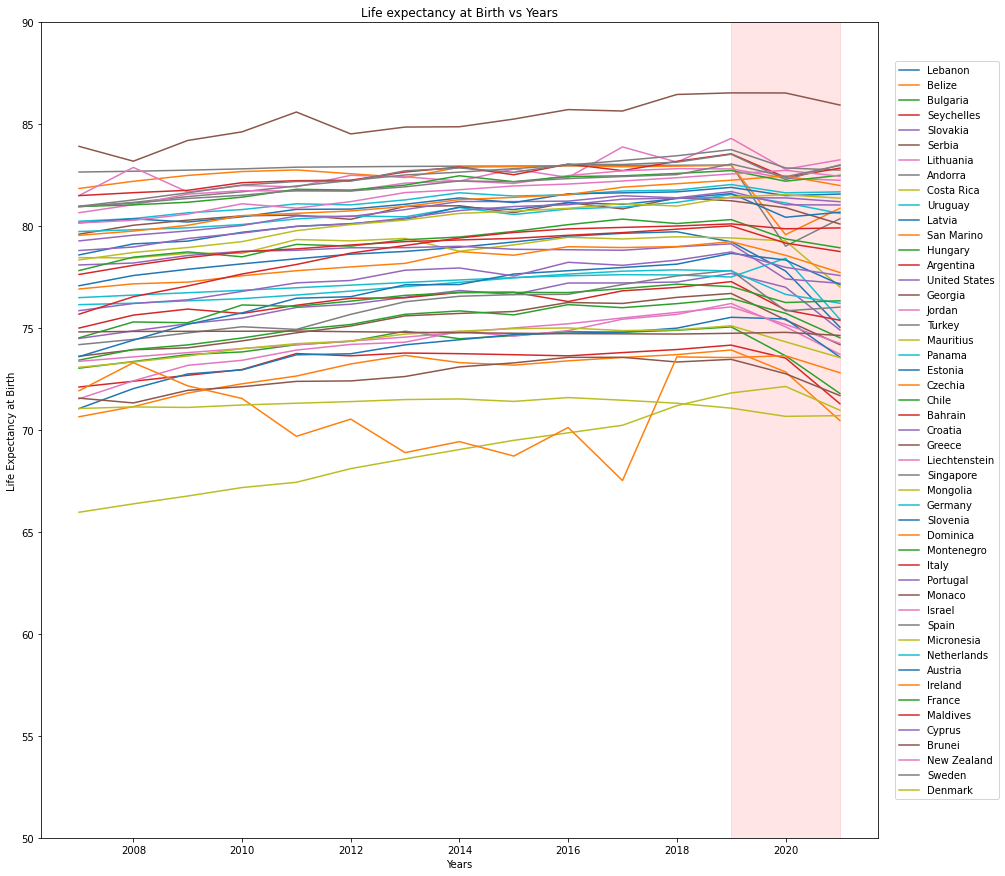

In [ ]:
worst_affected_le = plot_le_trend_covid(hdi_data, covid_data)

From the list of the worst affected countries obtained for each of the 2 metrics, we take the **intersection** of both lists to find the common countires which were severly affected.

In [ ]:
worst_affected_countries = list(set(worst_affected_gni) & set(worst_affected_le))
print(worst_affected_countries)

['Uruguay', 'Mauritius', 'Panama', 'Germany', 'Micronesia', 'Jordan', 'Mongolia', 'Andorra', 'San Marino', 'Lebanon', 'Portugal', 'Cyprus', 'Italy', 'Maldives', 'Argentina', 'Netherlands', 'Spain', 'Montenegro', 'Seychelles', 'Austria', 'Greece', 'Bahrain', 'Dominica', 'Belize', 'Slovakia', 'France']


Next we take the list of countries most impacted by covid, and plot the trend for the Happiness Score for only those countries where we see a dip in the score between the years 2019 and 2021.

<ipython-input-8-b21ad83994b0>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-b21ad83994b0>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

['Slovenia', 'Denmark', 'Israel', 'South Korea', 'Portugal', 'Greece', 'Switzerland', 'Australia', 'Bahrain', 'Serbia', 'Ireland', 'Uruguay', 'Norway', 'Sweden', 'Malta', 'Mauritius', 'Argentina', 'Turkey', 'Jordan']


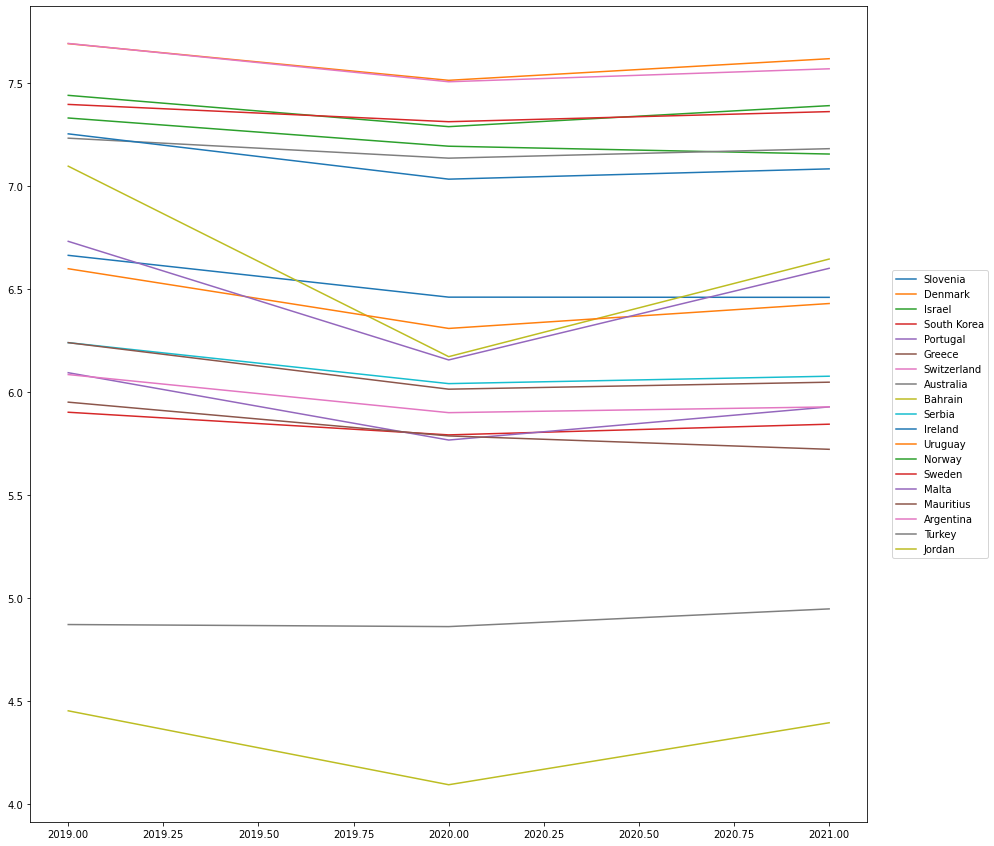

In [ ]:
def plot_happiness_trend_for_covid_impacted_nations(df1,df2):
  """
  Plots happiness score trend between the years 2019 and 2021 for covid impacted nations.

  @param df1: The dataframe which contains the happiness score of countries.
  @type df1: pd.DataFrame
  @param df2: The dataframe which contains COVID-19 infection data (Source: WHO).
  @type df2: pd.DataFrame
  """

  assert isinstance(df1, pd.DataFrame) and isinstance(df2,pd.DataFrame)
  assert "Happiness_Score" in df1.columns

  df1 = add_iso_code_col(df1)
  top_100_most_impacted_countries =  covid_most_impacted(df2)
  
  country_list = []
  happiness_scores = [] 

  for country in top_100_most_impacted_countries:
    happiness_scores_country = []
    for rows in df1.index:
      if df1['ISO'][rows] == country:
        a = df1['Country'][rows]
        if 2019<=df1['Year'][rows]<=2021:
          happiness_scores_country.append(df1['Happiness_Score'][rows])
    
    if len(happiness_scores_country) != 0:
        if len(happiness_scores_country) == 3:
          if happiness_scores_country[0] > happiness_scores_country[1]:
            country_list.append(a)
            happiness_scores.append(happiness_scores_country)

  years = list(range(2019,2022))

  plt.figure(figsize = (15,15))

  for i in range(len(country_list)):
        plt.plot(years, happiness_scores[i])

  plt.legend(country_list, bbox_to_anchor=(1.15, 0.5), loc='right')

  return country_list

affected_countries_hs = plot_happiness_trend_for_covid_impacted_nations(whr_data,covid_data)
print(affected_countries_hs)

So we have obtained 2 lists. Now we want to check how much overlap is there between the 2 lists obtained, i.e, countries most impacted by covid and countries which saw a dip in the Happiness Score between 2019-2021.

In [ ]:
print(set(affected_countries_hs).intersection(set(worst_affected_countries)))


{'Uruguay', 'Mauritius', 'Bahrain', 'Portugal', 'Argentina', 'Jordan', 'Greece'}


We see 7 out of the 19 countries which saw a drop in happiness in the intersection. While there is overlap, it is not significant. Why is this the case?

From the analysis of Gross National Income per capita during the covid years, we saw that the dip during covid years is not as much as we expected, i.e, our assumption that this metric will be significantly impacted is probably not correct. This is maybe due to the fact that while some industries like media, tourism and transportation were impacted, others like e-commerce and OTT flourished. Moreover, a lot of IT companies had adopted the WFH model by 2021, which saved the companies a lot in expenditures related to office setup and maintenance. Hence by 2021, the metric fluctuations got stabilized. We already saw in the scatter plot that Gross National income and Life Expectancy are positively correlated, however covid might have been a game changer. Even though life expectancy saw a dip, the correlation was not strong enough (during the covid years) to significantly impact Gross National income. However, there is no reason to believe that this would impact the nature of correlation for both these metrics with the Happiness Score, i.e, they should till remain positively correlated.

Therefore, it makes sense to just consider the metric Life Expectancy at Birth for our analysis, which is the metric which was severly impacted. Hence, we take the intersection of the list of countries with a dip in happiness score with the list of countries most impacted in terms of life expectancy.



In [ ]:
print(set(affected_countries_hs).intersection(set(worst_affected_le)))

{'Uruguay', 'Mauritius', 'Bahrain', 'Portugal', 'Ireland', 'Turkey', 'Serbia', 'Sweden', 'Denmark', 'Argentina', 'Jordan', 'Slovenia', 'Israel', 'Greece'}


We see that the intersection doubles and hence percentage overlap changes from **37%** to **74%** ! So, for 14 out of the 19 countries, we can explain a dip in happiness due to the impact of the covid pandemic. For the rest, the dip maybe due to some other factor(s) not included in our analysis, or may not be due to covid at all.

# CONCLUSION
Thanks to *Gallup Incorporated*, we are able to get a measure for happiness. This measure, as we know, is obtained from the Gallup world survey data. This leads to an interesting question: *how does this score relate with other commonly used metrics associated with a country?* The goal of our project was to find the influence of these metrics on the happiness score. From our analysis, we saw that the Happiness Score is strongly correlated with some of the factors we expect from our intuition, while for the other factors, the correlation is surprisingly weaker. From this we further verified that the happiest countries are indeed going strong in the areas where the correlation is found to be significant, and they also tend to stick to that trend.

Next we saw how the covid pandemic affects world happiness. While we can say that there should be a significant impact of covid on world happiness, the degree of impact is difficult to quantify. So we tried the following approach: see how covid impacts other known metrics (which we have already analyzed earlier) -> find the list of countries where the impact is the most -> verify that these countries also see a dip in their Happiness Score. We found a significant overlap from this analysis, and while it is not perfect, it does support the results of our analysis to a good extent. As a future step, we can consider more factors which are not included in our analysis, like affect of Global warming, pollution, etc., and we can also try incorporating the variation of the correlation of the metrics over time.

To conclude, the World Happiness Score is a useful metric which correlates to many of the commonly used metrics for a country, and one can use this score to track how the country is progressing over time. It won't be incorrect to say that a country with happy people is a country with better financial, educational, social and physical health.